# Airfoil Explorer

Notebook to quickly select and plot airfoils from the UIUC airfoil data base. It might do more stuff in the future

Quick instructions:

This file **must** be part of your nemo repository and thus is located at NEMO_ROOT/wings

You **must** have placed a shortcut/symlink to the dropbox folder at your NEMO_ROOT called 'dbfiles'

- Authors: Diego Montero, Fernando Valentini, Gustavo Violato
- First release: Nov. 2015

In [ ]:
%load_ext autoreload
%autoreload 2

In [38]:
%matplotlib inline
import os
import os.path as pth
import airfoil_tools as at
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.html import widgets
from glob import glob

In [20]:
# User defines variables

root = os.environ['NEMO_ROOT']
airfoil_db_path = root+'/dbfiles/airfoils/uiuc/coordinates'

In [47]:
foilfiles = glob(airfoil_db_path+'/*.dat')
foilnames = [pth.basename(foil)[:-4] for foil in foilfiles]
foilnames.sort()

t/c: 0.100
h/c: 0.019


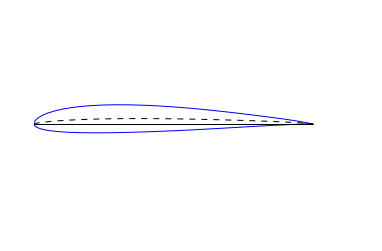

In [46]:
def plotchosenfoil(foilname):
    match = [fpth for fpth in foilfiles if foilname[0] in fpth]
    airfoil = at.ReadAirfoil(match[0])
    props = at.GetFoilProps(airfoil)
    for k in props.keys():
        print k + ': {:.3f}'.format(props[k])
    plt.plot(airfoil['coords'][:,0],airfoil['coords'][:,1])
    plt.plot([0,1],[0,0],'k')
    camberl = at.GetFoilCamberline(airfoil)
    plt.plot(camberl[:,0],camberl[:,1],'k--')
    plt.axis('equal')
    plt.axis('off')

widgets.interact(plotchosenfoil,
                 foilname=widgets.SelectMultiple(
        description="airfoils",
        options=foilnames))